<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn17_ProblemSolvingLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 17 - Problem Solving Day
The intent for today's lesson is to transform, solve, and interpret types of dynamic problems from Ch4/Ch5. First let's get the R library file straight as I have changed the capitalization in some of my files. Below is the ma391.r file that I use in my library as of lesson 17. Feel free to copy and use to solve problems in the class. You will have to update your documentation files in your package if you decide to change the function name.
Additionally, I built a meshgrid function and made another change to VectorField so that we do not have to import pracma library anymore.

In [0]:
##########################################################################
#### fprime - first derivative of a function##############################
##########################################################################
fprime = function (f,a,h=0.0001){(f(a+h)-f(a-h))/(2*h)}

##########################################################################
#### bisection method - easy way to solve for roots of a function ########
##########################################################################
bisection = function(f,a,b,tol=0.0001){
  if (f(a)*f(b) > 0){
    return ("Boundary Conditions Not Met")
  }
  else{
    middle = a
    while (abs(f(middle))>tol){
      middle = (a+b)/2
      if (f(middle)*f(a)>0) (a = middle)
      else (b = middle)
      x=middle
      y=f(middle)
      ## if you want to "see" what happens at every step, take off the # of the next line ##
      #cat(sprintf("x-Val: %.4f ; f(x-val): %.4f\n",x,y))
    }
    return (middle)
  }
}


##########################################################################
#### Newton's Method - single variable ###################################
##########################################################################
Newton = function(f,x0,eps=0.0001){
  xn = x0
  n=1
  while (abs(f(xn))>eps & n<1000){
    xn = xn-(f(xn)/fprime(f,xn))
    n=n+1
  }
  return(xn)
}

##########################################################################
## Gradient Vector Field  - first derivative of a multivariable function##
##########################################################################
Gradient = function(f,x,h=0.01){
  n = length(x)
  delF = array(0,dim=c(n,1))
  for (i in 1:n){
    xhp = xhm = x

    xhp[i]=xhp[i]+h
    xhm[i]=xhm[i]-h
    delF[i] = (f(xhp)-f(xhm))/(2*h)
  }
  return (delF)
}


##########################################################################
#### Hessian Matrix - 2nd Derivative of a multivariable function##########
##########################################################################
Hessian = function(f,x,hs=0.01){
  n = length(x)
  H = array(0,dim=c(n,n))

  for (i in 1:n){
    h = array(0,dim=c(n,1))
    h[i] = hs
    H[i,]=t((Gradient(f,x+h)-Gradient(f,x-h))/(2*hs))
    #print(H[i,])
  }
  return (H)
}

##########################################################################
####  Norm - length of a vector       ####################################
##########################################################################
Norm = function(x){
  tot = 0
  for (i in 1:length(x)){
    tot=tot+x[i]^2
  }
  return(sqrt(tot))
}


##########################################################################
####  Multivariable Newton's Method   ####################################
##########################################################################

mvNewton = function(f,x,tol=0.001){
  g = Gradient(f,x)
  i=0
  while (Norm(g)>1 & i<100){
    H = Hessian(f,x)
    p = solve(H,g)
    x = x-p
    g = Gradient(f,x)
    i=i+1
  }
  i=1
  while (Norm(g)>tol){
    g = Gradient(f,x)
    alpha = 1
    while (f(x-alpha*g)>f(x)){
      alpha=alpha*0.5}
    x = x-alpha*g
    i=i+1
  }
  return (x)
}

##########################################################################
#### Outer  - create contour plots ####################################
##########################################################################

Outer = function(f,x){
  n1 = length(x[[1]])
  n2 = length(x[[2]])
  res = matrix(0,nrow=n1,ncol=n2)
  rownames(res) = x[[1]]
  colnames(res) = x[[2]]
  for (i in 1:n1){
    for (j in 1:n2){
      res[i,j]=f(c(x[[1]][[i]],x[[2]][[j]]))
    }
  }
  return(res)
}


##########################################################################
#### meshgrid  - used by vector field ####################################
##########################################################################
meshgrid = function(x,y){
  n = length(x)
  m = length(y)
  mat1 = matrix(0,nrow=m,ncol=n)
  mat2 = matrix(0,nrow=m,ncol=n)
  for (i in 1:m){
    mat1[i,]=x
  }
  for (i in 1:n){
    mat2[,i]=y
  }
  ans = list(X=mat1,Y=mat2)
  return (ans)
}

##########################################################################
#### Quiver  - used by vector field ######################################
##########################################################################

quiver <- function(x, y, u, v,
                   scale = 0.05, angle = 10, length = 0.1, ...) {
  stopifnot(is.numeric(x), is.numeric(y), is.numeric(u), is.numeric(v))

  arrows(x, y, x+scale*u, y+scale*v, angle=10, length=length, ...)
}

###########################################################################
##### Vector Field ####################
###########################################################################

VectorField = function(fun, xlim, ylim, n = 16,
                       scale = 0.05, col = "darkblue",xlab = "xlim", ylab="ylim",
                       main="",...) {
  stopifnot(is.numeric(xlim), length(xlim) == 2,
            is.numeric(ylim), length(ylim) == 2)

  xpts = seq(xlim[1],xlim[2],length.out=n)
  ypts = seq(ylim[1],ylim[2],length.out=n)

  M = meshgrid(xpts, ypts)

  x = M$X
  y = M$Y
  px=M$X
  py=M$Y
  for (i  in 1:n){
    for (j in 1:n){
      ans = fun(c(xpts[j],ypts[i]))
      px[i,j]=ans[1]
      py[i,j]=ans[2]
    }
  }


  plot(xlim, ylim, type="n",xlab=xlab,ylab=ylab,main=main); grid()
  quiver(x, y, px, py, scale = scale, col = col, ...)
  #return(list(px=px,py=py))
}

###########################################################################
##### Jacobian of a 2D vector function ####################################
###########################################################################
Jacobian2 = function(f,x0,h=1E-4){
  jax = matrix(0,nrow=2,ncol=2)
  xph = c(x0[1]+h,x0[2]);xmh=c(x0[1]-h,x0[2])
  yph = c(x0[1],x0[2]+h);ymh=c(x0[1],x0[2]-h)
  jax[,1]=(f(xph)-f(xmh))/(2*h)
  jax[,2]=(f(yph)-f(ymh))/(2*h)
  return(jax)
}

###########################################################################
##### Zeros - root finding for a vector function ##########################
###########################################################################
Zeros = function(f,x0,h=1E-4,tol=1E-4){
  i = 1
  p=c(1,1)
  while (Norm(p)>tol & i<100){
    p = solve(Jacobian2(f,x0),-f(x0)) # linear algebra step
    x0 = x0+p
    #print(i)
    #print(x0)
    i=i+1
  }
  return(x0)
}

###########################################################################
##### path - output is the points along a particular dynamic system########
###########################################################################
path = function(f,x0,deltat=0.01,N=1000,tol=1E-4){
  len = length(x0)
  points=matrix(0,ncol=len)
  points[1,] = x0
  n = 0
  p = c(1,1)
  while(Norm(p)>tol & n<N){
    n=n+1
    p = f(x0)*deltat
    x0=x0+p
    points = rbind(points,x0)
  }

  rownames(points)=0:n
  return(points)
}

## Problem 7 - Book
Below let's use the tools that we have to solve the problem in the book.

In [0]:
options(warn=-1)
library(ma391laporte)

[1] 9333.333 1333.333
[1]  1.000000e+04 -4.844192e-17
[1] -4.846761e-27 -3.877409e-26
[1] 5.194491e-26 6.000000e+03


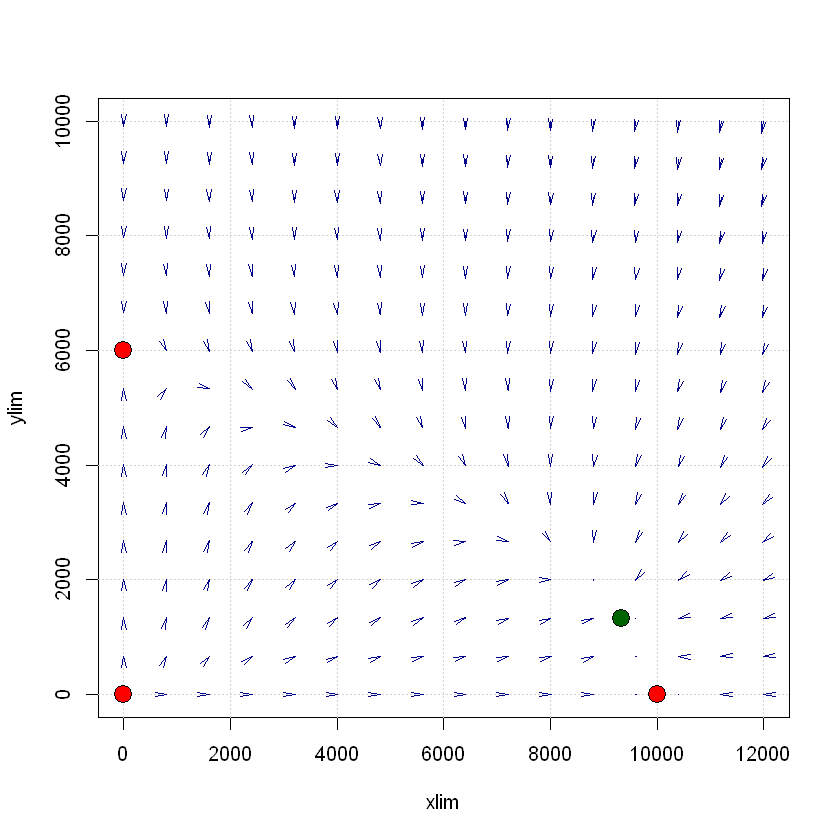

In [0]:
## Part (a) Sketch the vector field and plot the equilibrium points.
t = 1/2
f = function(x){c(0.10*x[1]-0.10/10000*x[1]^2-0.10*t/10000*x[1]*x[2],
                 0.25*x[2]-0.25/6000*x[2]^2-0.25*t/6000*x[1]*x[2])}
VectorField(f,xlim=c(0,12000),ylim=c(0,10000))
x0 = c(6000,10000)
xStar=Zeros(f,x0)
points(xStar[1],xStar[2],pch=21,bg="darkgreen",cex=2)
print(xStar)
x0 = c(6000,1)
xStar=Zeros(f,x0)
points(xStar[1],xStar[2],pch=21,bg="red",cex=2)
print(xStar)
x0 = c(1,1)
xStar=Zeros(f,x0)
points(xStar[1],xStar[2],pch=21,bg="red",cex=2)
print(xStar)
x0 = c(1,7000)
xStar=Zeros(f,x0)
points(xStar[1],xStar[2],pch=21,bg="red",cex=2)
print(xStar)

In [0]:
## (b) For each equilibrium pt, determine the linear approximation in it neighborhood.
# (9333.3,1333.3) - your exercise wants you to do this for all of the equilibrium points
xStar=c(9333.3,1333.3)
A = Jacobian2(f,xStar);print(A)
ev=eigen(A);print(ev)

            [,1]        [,2]
[1,] -0.09333250 -0.04666650
[2,] -0.02777708 -0.05555208
eigen() decomposition
$values
[1] -0.11510061 -0.03378397

$vectors
           [,1]       [,2]
[1,] -0.9062545  0.6168270
[2,] -0.4227326 -0.7870987



## Linear approximation of Nonlinear System
Our linear system of equations is determined by the derivative of the vector function (Jacobian Matrix). <br><br>
$$ A = \begin{bmatrix} \frac{\partial f_1}{\partial x_1}&\frac{\partial f_1}{\partial x_2} & ... \\ \frac{\partial f_2}{\partial x_1}&\frac{\partial f_2}{\partial x_2} & ...\\ \vdots&\vdots&\ddots \end{bmatrix} $$ <br>
For $x_1$ and $x_2$ values near the equilibrium point, this linear system of differential equations will be approximately the same as our nonlinear function. <br><br>
$$ \frac{d\vec{x}}{dt}\approx A (\vec{x}-\vec{x}^*) = \begin{bmatrix}-0.09333250&-0.04666650 \\-0.02777708& -0.05555208\end{bmatrix} (\vec{x}-\vec{x}^*)$$<br>
As an exercise (not part of the problem above), lets compute the paths of the linear and nonlinear system of equations and compare them. We are counting on them to be very close.

In [0]:
## Linear path - pts_linear -> start at some point "close" to x* (9333.3,1333.3)
xStar = c(9333.3,1333.3)
x0=c(9330,1330)
x = x0
N = 50
pts_linear = matrix(0,nrow=N,ncol=2)
pts_linear[1,]=x0
for (i in 2:N){
    dx = A%*%x-A%*%xStar #linear approximation
    x = x+dx
    pts_linear[i,]=x
}
pts_nonlinear = path(f,x0,N=N-1,deltat=1) #path is the function that uses the nonlinear function
result = data.frame(x_l=pts_linear[,1],x_n=pts_nonlinear[,1],y_l=pts_linear[,2],y_n=pts_nonlinear[,2])
print(result)

        x_l      x_n      y_l      y_n
0  9330.000 9330.000 1330.000 1330.000
1  9330.462 9330.467 1330.275 1330.277
2  9330.868 9330.877 1330.522 1330.526
3  9331.225 9331.237 1330.744 1330.750
4  9331.538 9331.553 1330.943 1330.951
5  9331.812 9331.830 1331.123 1331.133
6  9332.053 9332.073 1331.286 1331.296
7  9332.263 9332.286 1331.432 1331.444
8  9332.447 9332.472 1331.565 1331.578
9  9332.608 9332.634 1331.685 1331.699
10 9332.748 9332.776 1331.794 1331.809
11 9332.869 9332.899 1331.893 1331.909
12 9332.975 9333.006 1331.983 1332.001
13 9333.067 9333.099 1332.065 1332.084
14 9333.146 9333.179 1332.140 1332.159
15 9333.215 9333.248 1332.209 1332.229
16 9333.274 9333.307 1332.272 1332.293
17 9333.324 9333.358 1332.330 1332.351
18 9333.367 9333.402 1332.383 1332.405
19 9333.404 9333.439 1332.432 1332.455
20 9333.435 9333.470 1332.477 1332.500
21 9333.460 9333.496 1332.519 1332.543
22 9333.482 9333.518 1332.558 1332.582
23 9333.499 9333.536 1332.594 1332.619
24 9333.514 9333.550 1332

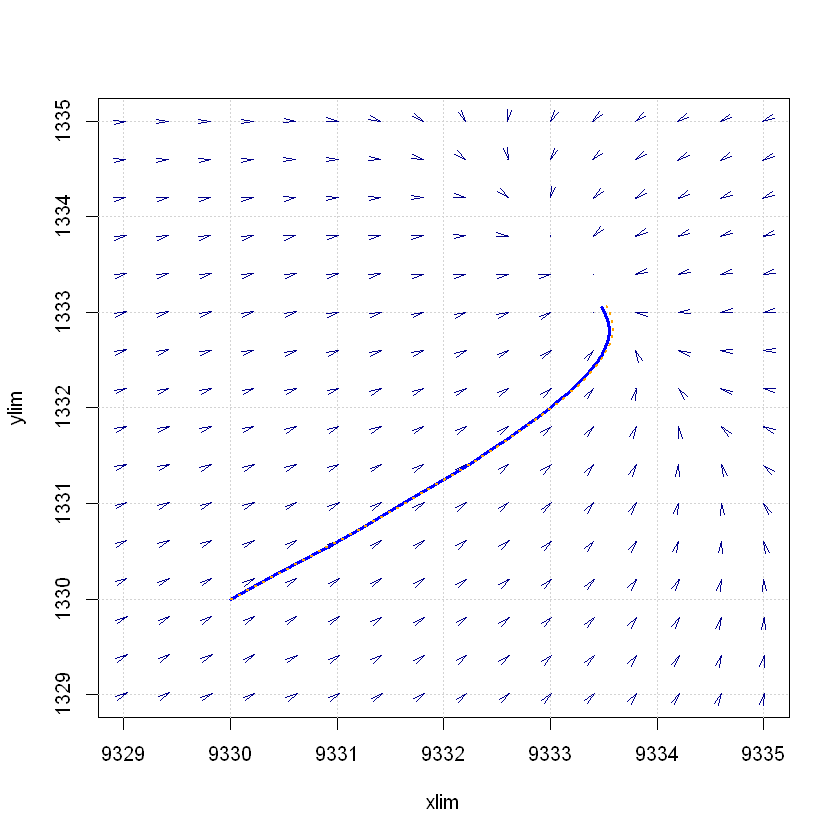

In [0]:
VectorField(f,xlim=c(9329,9335),ylim=c(1329,1335))
points(result$x_l,result$y_l,type="l",col="blue",lwd=3)
points(result$x_n,result$y_n,type="l",lty="dotted",col="orange",lwd=2)

As you can see from the numbers in the data frame and the plot, the linear approximation is converging to the solution which should give you more confidence about using the linear system to approximate the nonlinear one. <br><br>
Since we are using the matrix $A$ to solve the problem, we are particularly interested in the dynamics of this matrix and the system:<br><br>
$$\frac{d\vec{x}}{dt}= A\vec{x},\hspace{5pt}\vec{x}(0)=x_0 $$<br>
If it goes to $\vec{0}$, then the nonlinear system will go toward the equilibrium.
Continuing with the problem, we need to write the solution to this linear approximation using the eigenvalue/eigenvector information for the matrix A:<br><br>
$$\vec{x}(t)=c_1 e^{-0.1151t} \begin{bmatrix}-0.906\\-0.423 \end{bmatrix}+ c_1 e^{-0.0.034t} \begin{bmatrix}0.617\\-0.787 \end{bmatrix}$$<br>
You can see from the equation (recall this from class), the linear system goes to $\vec{0}$ because the eigenvalues are all less than 0. This means that the equilibrium point $\begin{bmatrix}9333.3\\1333.3\end{bmatrix}$ is stable. The phase portrait of this system is centered around $\vec{0}$ and contains the vector(direction) field and a couple of paths through the direction field. We will cover this on the next class in Section 5.3.

In [0]:
##(d) What happens if a small number of hardwood trees are introduced into a mature area of softwood trees.
x0 = c(1,6000) #10 hardwoods along with the 6000 carrying capacity for softwoods
pts = path(f,x0,N=5000,deltat=.5)
tail(pts)

1033,9333.329,1333.338
1034,9333.330,1333.338
1035,9333.330,1333.338
1036,9333.330,1333.338
1037,9333.330,1333.338
1038,9333.330,1333.338


#### (d) With the introduction of a few hardwoods, the system converges to the stable equilibrium -> (9333.3,1333.3)
What happens when we have no hardwoods?<br>
No softwoods?<br>
Both of these converge to their carrying capacity (see below). Be prepared to answer the question of why these converge to their carrying capacity even though the results of their linear approximation/eigenvalue decomposition suggests that they are not stable. 

In [0]:
x0 = c(0,3000) 
pts = path(f,x0,N=5000,deltat=.5)
tail(pts)
x0 = c(3000,0) 
pts = path(f,x0,N=5000,deltat=.5)
tail(pts)

116,0,5999.999
117,0,5999.999
118,0,5999.999
119,0,5999.999
120,0,5999.999
121,0,5999.999


315,9999.998,0
316,9999.998,0
317,9999.998,0
318,9999.998,0
319,9999.998,0
320,9999.998,0
